# Hindi Devanagari Characters

In [10]:


import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
train_path = "/Users/rammishra/Downloads/DevanagariHindiMNIST/Hindi/Train"
test_path = "/Users/rammishra/Downloads/DevanagariHindiMNIST/Hindi/Test"

In [12]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(32, 32),
    color_mode='grayscale',
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(32, 32),
    color_mode='grayscale',
    class_mode='categorical'
)

Found 78200 images belonging to 46 classes.
Found 13800 images belonging to 46 classes.


In [13]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(46, activation='softmax')
])

In [14]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 2304)              0         
                                                                 
 dense_4 (Dense)             (None, 128)              

In [15]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

Epoch 1/10
2444/2444 [==============================] - 25s 10ms/step - loss: 2.2957 - accuracy: 0.6020 - val_loss: 0.4620 - val_accuracy: 0.8843
Epoch 2/10
2444/2444 [==============================] - 24s 10ms/step - loss: 1.2114 - accuracy: 0.7743 - val_loss: 0.4376 - val_accuracy: 0.9151
Epoch 3/10
2444/2444 [==============================] - 26s 11ms/step - loss: 1.3496 - accuracy: 0.8030 - val_loss: 0.5078 - val_accuracy: 0.9227
Epoch 4/10
2444/2444 [==============================] - 25s 10ms/step - loss: 1.6142 - accuracy: 0.8230 - val_loss: 0.5381 - val_accuracy: 0.9330
Epoch 5/10
2444/2444 [==============================] - 25s 10ms/step - loss: 2.1094 - accuracy: 0.8349 - val_loss: 0.7677 - val_accuracy: 0.9347
Epoch 6/10
2444/2444 [==============================] - 25s 10ms/step - loss: 2.5664 - accuracy: 0.8502 - val_loss: 0.8683 - val_accuracy: 0.9446
Epoch 7/10
2444/2444 [==============================] - 25s 10ms/step - loss: 3.1198 - accuracy: 0.8593 - val_loss: 1.1779 -

In [16]:
loss, accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

432/432 [==============================] - 3s 6ms/step - loss: 2.2825 - accuracy: 0.9488
Test Accuracy: 94.88%


1/1 [==============================] - 0s 33ms/step


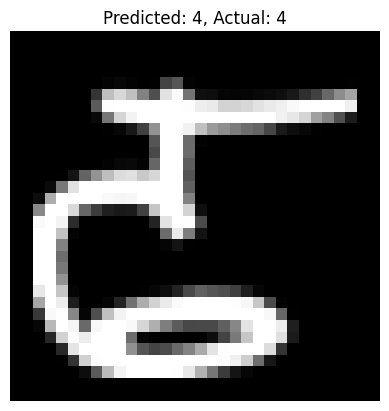

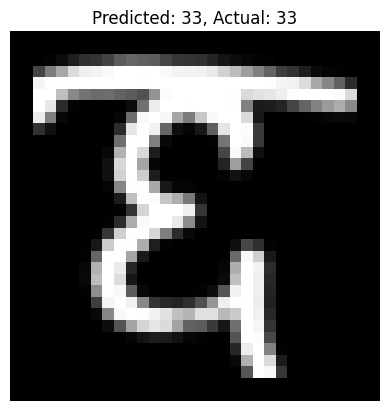

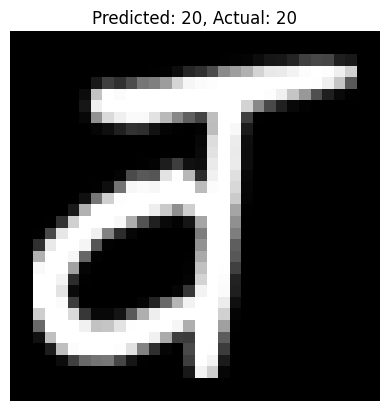

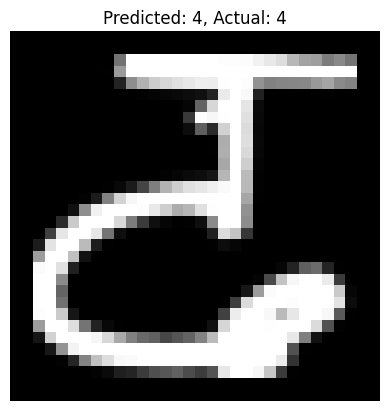

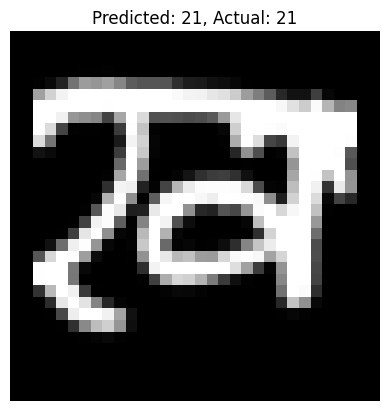

In [17]:
sample_images, sample_labels = next(test_generator)
predictions = model.predict(sample_images)

for i in range(5):
    plt.imshow(sample_images[i].reshape(32, 32), cmap='gray')
    plt.title(f"Predicted: {np.argmax(predictions[i])}, Actual: {np.argmax(sample_labels[i])}")
    plt.axis('off')
    plt.show()

In [ ]:
model.save("hindi_character_classifier.h5")